# 웹 스크레이핑을 사용한 데이터 분석
---
[한국 거래소 기업공시채널](https://kind.krx.co.kr)에 접속하여 다음과 같은 절차를 따른다:
상장법인상세정보 -> 상장법인목록 -> excel 다운로드

실습 파일 준비 완료.

In [1]:
import pandas as pd
krx_list = pd.read_html('./krx_list.xls')
krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format)

In [2]:
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,하나금융17호스팩,363260,금융 지원 서비스업,기업인수합병,2021-02-10,12월,남강욱,NaN,서울특별시
1,아이퀘스트,262840,소프트웨어 개발 및 공급업,"패키지 ERP, 구축형 ERP 등",2021-02-05,12월,김순모,http://www.iquest.co.kr,서울특별시
2,피비파마,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르
3,신한제7호스팩,366330,금융 지원 서비스업,SPAC,2021-02-04,12월,김병훈,NaN,서울특별시
4,레인보우로보틱스,277810,특수 목적용 기계 제조업,"협동로봇, 천문마운트시스템, 이족보행로봇 등",2021-02-03,12월,이정호,http://www.rainbow-robotics.com/new/index_ko.php,대전광역시
...,...,...,...,...,...,...,...,...,...
2417,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2418,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2419,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2420,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


혹은 인터넷 다운로드 URL을 통해 바로 데이터를 준비할 수도 있다.

In [3]:
df = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&pageIndex=1&currentPageSize=5000&comAbbrv=&beginIndex=&orderMode=3&orderStat=D&isurCd=&repIsuSrtCd=&searchCodeType=&marketType=&searchType=13&industry=&fiscalYearEnd=all&comAbbrvTmp=&location=all')[0]
df.종목코드 = df.종목코드.map('{:06d}'.format)

In [4]:
df = df.sort_values(by='종목코드')

In [5]:
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2328,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,박기환,http://www.dong-wha.co.kr,서울특별시
2320,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,이기복,http://www.krmotors.com,경상남도
2419,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2418,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2410,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
357,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
234,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,갈지휘,http://www.snk-corp.co.jp,일본
71,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩
93,소마젠,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,Ryan W. Kim (김운봉),NaN,미국


## 4.3 웹에서 일별 시세 구하기
---
참고 링크: [네이버 금융](https://finance.naver.com/)

In [6]:
from bs4 import BeautifulSoup
import urllib.request as urllib

opener = urllib.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0')]

url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

response = opener.open(url)

with response as doc:
    html = BeautifulSoup(doc,'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')

last_page = s[-1]

In [7]:
df = pd.DataFrame()

sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
# for page in range(1, 31):
    page_url = f'{sise_url}&page={page}'
    print(page_url)
    response = opener.open(page_url)
    
    df = df.append(pd.read_html(response.read(), header=0)[0])
    
df = df.dropna()

https://finance.naver.com/item/sise_day.nhn?code=068270&page=1
https://finance.naver.com/item/sise_day.nhn?code=068270&page=2
https://finance.naver.com/item/sise_day.nhn?code=068270&page=3
https://finance.naver.com/item/sise_day.nhn?code=068270&page=4
https://finance.naver.com/item/sise_day.nhn?code=068270&page=5
https://finance.naver.com/item/sise_day.nhn?code=068270&page=6
https://finance.naver.com/item/sise_day.nhn?code=068270&page=7
https://finance.naver.com/item/sise_day.nhn?code=068270&page=8
https://finance.naver.com/item/sise_day.nhn?code=068270&page=9
https://finance.naver.com/item/sise_day.nhn?code=068270&page=10
https://finance.naver.com/item/sise_day.nhn?code=068270&page=11
https://finance.naver.com/item/sise_day.nhn?code=068270&page=12
https://finance.naver.com/item/sise_day.nhn?code=068270&page=13
https://finance.naver.com/item/sise_day.nhn?code=068270&page=14
https://finance.naver.com/item/sise_day.nhn?code=068270&page=15
https://finance.naver.com/item/sise_day.nhn?code=

https://finance.naver.com/item/sise_day.nhn?code=068270&page=129
https://finance.naver.com/item/sise_day.nhn?code=068270&page=130
https://finance.naver.com/item/sise_day.nhn?code=068270&page=131
https://finance.naver.com/item/sise_day.nhn?code=068270&page=132
https://finance.naver.com/item/sise_day.nhn?code=068270&page=133
https://finance.naver.com/item/sise_day.nhn?code=068270&page=134
https://finance.naver.com/item/sise_day.nhn?code=068270&page=135
https://finance.naver.com/item/sise_day.nhn?code=068270&page=136
https://finance.naver.com/item/sise_day.nhn?code=068270&page=137
https://finance.naver.com/item/sise_day.nhn?code=068270&page=138
https://finance.naver.com/item/sise_day.nhn?code=068270&page=139
https://finance.naver.com/item/sise_day.nhn?code=068270&page=140
https://finance.naver.com/item/sise_day.nhn?code=068270&page=141
https://finance.naver.com/item/sise_day.nhn?code=068270&page=142
https://finance.naver.com/item/sise_day.nhn?code=068270&page=143
https://finance.naver.com

https://finance.naver.com/item/sise_day.nhn?code=068270&page=256
https://finance.naver.com/item/sise_day.nhn?code=068270&page=257
https://finance.naver.com/item/sise_day.nhn?code=068270&page=258
https://finance.naver.com/item/sise_day.nhn?code=068270&page=259
https://finance.naver.com/item/sise_day.nhn?code=068270&page=260
https://finance.naver.com/item/sise_day.nhn?code=068270&page=261
https://finance.naver.com/item/sise_day.nhn?code=068270&page=262
https://finance.naver.com/item/sise_day.nhn?code=068270&page=263
https://finance.naver.com/item/sise_day.nhn?code=068270&page=264
https://finance.naver.com/item/sise_day.nhn?code=068270&page=265
https://finance.naver.com/item/sise_day.nhn?code=068270&page=266
https://finance.naver.com/item/sise_day.nhn?code=068270&page=267
https://finance.naver.com/item/sise_day.nhn?code=068270&page=268
https://finance.naver.com/item/sise_day.nhn?code=068270&page=269
https://finance.naver.com/item/sise_day.nhn?code=068270&page=270
https://finance.naver.com

https://finance.naver.com/item/sise_day.nhn?code=068270&page=383
https://finance.naver.com/item/sise_day.nhn?code=068270&page=384
https://finance.naver.com/item/sise_day.nhn?code=068270&page=385
https://finance.naver.com/item/sise_day.nhn?code=068270&page=386


In [8]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.02.10,332000.0,4000.0,326500.0,332000.0,324500.0,724743.0
2,2021.02.09,328000.0,8000.0,336000.0,337500.0,328000.0,984780.0
3,2021.02.08,336000.0,5500.0,350000.0,351500.0,336000.0,784558.0
4,2021.02.05,341500.0,0.0,347500.0,355000.0,335000.0,1997418.0
5,2021.02.04,341500.0,6000.0,345000.0,349500.0,337500.0,1099579.0
...,...,...,...,...,...,...,...
10,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
11,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
12,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
13,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


## 종가차트 그리기

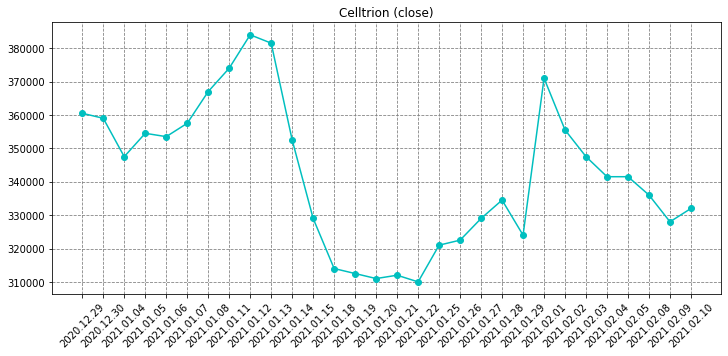

In [13]:
rdf = df.iloc[0:30]
rdf = rdf.sort_values(by='날짜', ascending=True)

from matplotlib import pyplot as plt

plt.figure(figsize=(12,5))
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(rdf.날짜, rdf.종가, 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

## 캔들 차트 그리기 - Mpl Fianace 구버전(mpl_finance)

In [10]:
from matplotlib import dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

for idx in range(0, len(rdf)):
    dt = datetime.strptime(rdf.날짜.values[idx], '%Y.%m.%d').date()
    rdf.날짜.values[idx] = mdates.date2num(dt)
    
ohlc = rdf[['날짜','시가','고가','저가','종가']]

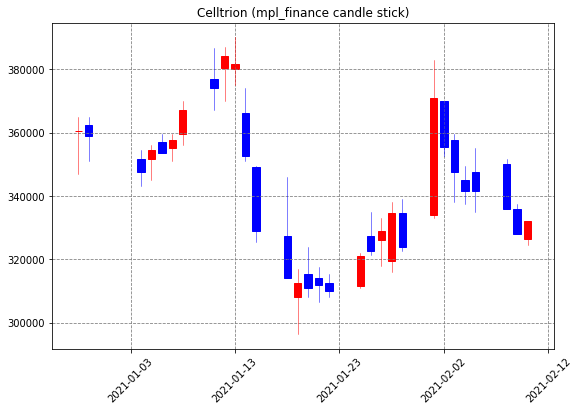

In [11]:
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

## 캔들 차트 그리기 - Mpl Finance 신버전(mplfinance)

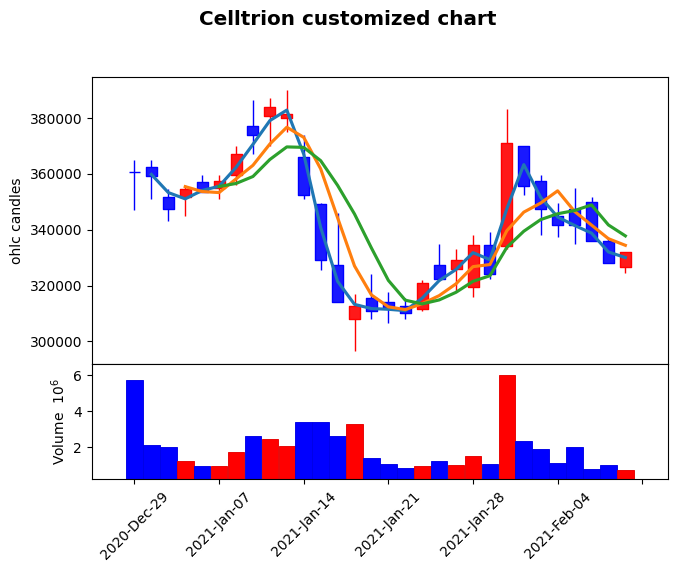

In [32]:
import mplfinance as mpf
rdf = rdf.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close', '거래량':'Volume'})
rdf.index = pd.to_datetime(rdf.index)
rdf = rdf[['Open','High','Low','Close','Volume']]

kwargs = dict(title='Celltrion customized chart', type='candle', mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(rdf, **kwargs, style=s)